In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import plotly.io as pio
pio.renderers.default='notebook'
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sys
import os
from functools import reduce
from sklearn.model_selection import cross_validate
import time
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

In [2]:
lst = []
subj_indices = dict()
tmp = 0
count = 0
for i in range(0,9):
    subj_end = (len(pd.read_csv("Processed_Data/data{}.csv".format(i))))
    subj_indices[i] = (tmp, tmp + subj_end )
    tmp += subj_end 
    lst.append(pd.read_csv("Processed_Data/data{}.csv".format(i)))
df_train = reduce(lambda a,b : pd.concat([a,b], ignore_index = True, sort = False),lst)

In [3]:
labels = np.array(df_train["label"])
df_train = df_train.drop(columns = ["Unnamed: 0", "label"])


In [4]:
df_train

,pc1_skewness,pc2_skewness,svm_skewness,svm_signal_range,pc1_acv_IQR,pc2_acv_IQR,svm_acv_IQR,pc1_mean_cross_rate,pc2_mean_cross_rate,svm_mean_cross_rate,...,pc2_dom_freq_mag,pc1_spectral_arclength,pc2_spectral_arclength,svm_spectral_arclength,pc1_jerk,pc2_jerk,svm_jerk,pc1_log_jerk,pc2_log_jerk,svm_log_jerk
0,0.217169,0.427684,-0.267858,2.288246,0.047415,1.006595,0.086815,0.293333,0.186667,0.373333,...,0.404574,-7.740445,-11.284703,-6.066675,-2.907525e+06,-5.071279e+06,-2.799167e+06,-14.882813,-15.439104,-14.844833
1,0.334265,0.323507,-0.401467,2.291532,0.132898,1.313510,0.157584,0.213333,0.186667,0.360000,...,0.364872,-9.202736,-11.273143,-7.156688,-2.073754e+06,-5.154051e+06,-2.861145e+06,-14.544871,-15.455294,-14.866732
2,0.183891,0.444156,-0.412860,2.272023,0.150718,1.140971,0.093732,0.280000,0.173333,0.373333,...,0.379567,-9.435125,-12.916185,-7.161962,-2.824175e+06,-3.346072e+06,-2.030822e+06,-14.853727,-15.023298,-14.523951
3,-0.127863,0.634129,-0.715171,2.432092,0.084887,1.228101,0.061760,0.280000,0.173333,0.346667,...,0.359823,-9.227076,-12.712140,-7.005157,-3.739520e+06,-3.210541e+06,-1.851811e+06,-15.134468,-14.981950,-14.431675
4,-0.195138,0.516711,-0.693328,2.410430,0.105364,1.597534,0.130668,0.213333,0.186667,0.346667,...,0.398151,-8.267170,-11.144138,-6.980101,-2.663962e+06,-3.297445e+06,-1.951141e+06,-14.795325,-15.008658,-14.483925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,-2.752360,2.716700,2.636396,0.675728,0.000371,0.003032,0.000547,0.040000,0.026667,0.066667,...,0.000000,-5.713489,-6.669971,-6.202085,-4.323322e+04,-1.468465e+05,-1.552828e+04,-10.674364,-11.897143,-9.650418
3825,0.198934,-0.375018,2.003070,2.501907,0.089026,0.062560,0.010948,0.093333,0.066667,0.160000,...,0.178014,-9.793343,-13.066707,-6.471772,-7.463166e+05,-6.311640e+05,-1.174204e+05,-13.522905,-13.355321,-11.673516
3826,0.049758,-0.263374,2.342345,2.501907,0.059870,0.025049,0.007552,0.080000,0.040000,0.173333,...,0.000000,-8.536678,-10.531954,-5.746509,-7.946319e+05,-7.331119e+05,-1.682660e+05,-13.585634,-13.505054,-12.033301
3827,-4.099096,0.746744,0.169340,0.501452,0.000102,0.000209,0.000083,0.186667,0.093333,0.200000,...,0.000000,-6.210468,-6.526799,-6.458801,-9.493020e+04,-9.455323e+04,-6.883410e+04,-11.460897,-11.456918,-11.139455


In [5]:
np.unique(labels, return_counts = True)


(array([0, 1]), array([2363, 1466]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_train, np.array(labels), test_size=0.2, random_state=5)




In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

tree= DecisionTreeClassifier(random_state=24) 
forest= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()
svm= SVC(random_state=24, probability = True)
log = LogisticRegression()
adb = AdaBoostClassifier()

# now, create a list with the objects 
models= [tree, forest, knn, svm, adb, log]
models_perf = []

for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    score= metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) # this gives us how often the algorithm predicted correctly
    clf_report= metrics.classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The ROC Score of model {type(model).__name__} is {score:.2f}")
    print(clf_report)
    print("\n")
    models_perf.append([model, score])
    


The ROC Score of model DecisionTreeClassifier is 0.80
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       476
           1       0.74      0.77      0.75       290

    accuracy                           0.81       766
   macro avg       0.80      0.80      0.80       766
weighted avg       0.81      0.81      0.81       766



The ROC Score of model RandomForestClassifier is 0.95
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       476
           1       0.85      0.82      0.84       290

    accuracy                           0.88       766
   macro avg       0.87      0.87      0.87       766
weighted avg       0.88      0.88      0.88       766



The ROC Score of model KNeighborsClassifier is 0.76
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       476
           1       0.62      0.55      0.58       290

    accuracy      

# Grid Search For hyperparameters

Randomized Grid search for best hyperparameters. 

In [7]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 40, 80, None],
              'max_features': [None, 'sqrt'],
              'criterion' : ["gini", "entropy"],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200,400,800,2000]}


In [8]:
rf = RandomForestClassifier()

In [9]:
rf_search = HalvingRandomSearchCV(rf, 
                                  param_grid,
                                  resource='n_samples',
                                  max_resources='auto',
                                  factor = 10,
                                  verbose = 20,
                                  random_state = 28).fit(X_train, y_train)

#rf_randomsearch = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=20, random_state= None, scoring = "roc_auc")
#rf_randomsearch.fit(df_train, labels)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 20
max_resources_: 3063
aggressive_elimination: False
factor: 10
----------
iter: 0
n_candidates: 153
n_resources: 20
Fitting 5 folds for each of 153 candidates, totalling 765 fits
[CV 1/5; 1/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/5; 1/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.8s
[CV 2/5; 1/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 2/5; 1/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.8s
[CV 3/5; 1/153] START bootstrap=True, criterion=gin

[CV 4/5; 5/153] END bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5; 5/153] START bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 5/5; 5/153] END bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=(train=1.000, test=0.333) total time=   0.4s
[CV 1/5; 6/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 1/5; 6/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.7s
[CV 2/5; 6/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, 

[CV 3/5; 10/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.6s
[CV 4/5; 10/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 4/5; 10/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=0.938, test=1.000) total time=   0.7s
[CV 5/5; 10/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 5/5; 10/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=0.938, test=0.333) total time=   1.6s
[CV 1/5; 11/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_sampl

[CV 2/5; 15/153] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/5; 15/153] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 3/5; 15/153] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5; 15/153] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 15/153] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=1.000) total time=   0.3s
[CV 5/5; 15/153] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None,

[CV 1/5; 20/153] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 2/5; 20/153] START bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 20/153] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/5; 20/153] START bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 3/5; 20/153] END bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5; 20/153] START bootstrap=True, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_sampl

[CV 5/5; 24/153] END bootstrap=True, criterion=gini, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=0.333) total time=   1.6s
[CV 1/5; 25/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 1/5; 25/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=0.750) total time=   0.5s
[CV 2/5; 25/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 2/5; 25/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 3/5; 25/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=None,

[CV 4/5; 29/153] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.938, test=1.000) total time=   0.4s
[CV 5/5; 29/153] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400
[CV 5/5; 29/153] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.938, test=0.333) total time=   0.4s
[CV 1/5; 30/153] START bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 1/5; 30/153] END bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 2/5; 30/153] START bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samp

[CV 3/5; 34/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.7s
[CV 4/5; 34/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 4/5; 34/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=(train=0.938, test=1.000) total time=   2.8s
[CV 5/5; 34/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 5/5; 34/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=0.667) total time=   2.8s
[CV 1/5; 35/153] START bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, m

[CV 2/5; 39/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/5; 39/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 39/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.750) total time=   0.3s
[CV 4/5; 39/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 4/5; 39/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5; 39/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_sampl

[CV 1/5; 44/153] END bootstrap=False, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=(train=0.867, test=1.000) total time=   0.5s
[CV 2/5; 44/153] START bootstrap=False, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400
[CV 2/5; 44/153] END bootstrap=False, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=(train=0.933, test=1.000) total time=   0.5s
[CV 3/5; 44/153] START bootstrap=False, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400
[CV 3/5; 44/153] END bootstrap=False, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=(train=0.933, test=0.750) total time=   0.4s
[CV 4/5; 44/153] START bootstrap=False, criterion=entropy, max_depth=40, max_features=None, 

[CV 5/5; 48/153] END bootstrap=False, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=0.333) total time=   1.2s
[CV 1/5; 49/153] START bootstrap=False, criterion=gini, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 1/5; 49/153] END bootstrap=False, criterion=gini, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 2/5; 49/153] START bootstrap=False, criterion=gini, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 2/5; 49/153] END bootstrap=False, criterion=gini, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 3/5; 49/153] START bootstrap=False, criterion=gini, max_depth=40, max_features=None, min_samples_leaf=1, 

[CV 4/5; 53/153] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.8s
[CV 5/5; 53/153] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 5/5; 53/153] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=0.667) total time=   2.9s
[CV 1/5; 54/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 1/5; 54/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=(train=0.800, test=0.500) total time=   2.8s
[CV 2/5; 54/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_

[CV 3/5; 58/153] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=1.000) total time=   1.1s
[CV 4/5; 58/153] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800
[CV 4/5; 58/153] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=1.000) total time=   1.2s
[CV 5/5; 58/153] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800
[CV 5/5; 58/153] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=0.333) total time=   1.1s
[CV 1/5; 59/153] START bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples

[CV 2/5; 63/153] END bootstrap=False, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=1.000) total time=   0.9s
[CV 3/5; 63/153] START bootstrap=False, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800
[CV 3/5; 63/153] END bootstrap=False, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=0.750) total time=   0.9s
[CV 4/5; 63/153] START bootstrap=False, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800
[CV 4/5; 63/153] END bootstrap=False, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=0.667) total time=   0.9s
[CV 5/5; 63/153] START bootstrap=False, criterion=entropy, max_depth=80, max_features=None, min_s

[CV 1/5; 68/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=0.800, test=0.500) total time=   2.8s
[CV 2/5; 68/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 2/5; 68/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=0.933, test=1.000) total time=   2.8s
[CV 3/5; 68/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 3/5; 68/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=0.800, test=0.750) total time=   2.8s
[CV 4/5; 68/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_

[CV 5/5; 72/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=(train=0.938, test=0.333) total time=   0.9s
[CV 1/5; 73/153] START bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 1/5; 73/153] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=(train=0.867, test=1.000) total time=   0.2s
[CV 2/5; 73/153] START bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 2/5; 73/153] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=(train=0.867, test=0.500) total time=   0.2s
[CV 3/5; 73/153] START bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_sampl

[CV 4/5; 77/153] END bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=(train=0.938, test=0.667) total time=   2.8s
[CV 5/5; 77/153] START bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 5/5; 77/153] END bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=(train=0.938, test=0.667) total time=   2.8s
[CV 1/5; 78/153] START bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 1/5; 78/153] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 2/5; 78/153] START bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, min_s

[CV 3/5; 82/153] END bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5; 82/153] START bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 82/153] END bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.938, test=0.667) total time=   0.3s
[CV 5/5; 82/153] START bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 5/5; 82/153] END bootstrap=True, criterion=entropy, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.875, test=0.667) total time=   0.3s
[CV 1/5; 83/153] START bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples

[CV 2/5; 87/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.867, test=0.500) total time=   0.4s
[CV 3/5; 87/153] START bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400
[CV 3/5; 87/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.933, test=0.750) total time=   0.4s
[CV 4/5; 87/153] START bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400
[CV 4/5; 87/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.875, test=0.667) total time=   0.4s
[CV 5/5; 87/153] START bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min

[CV 1/5; 92/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=(train=1.000, test=0.750) total time=   2.1s
[CV 2/5; 92/153] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000
[CV 2/5; 92/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=(train=0.933, test=1.000) total time=   2.1s
[CV 3/5; 92/153] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000
[CV 3/5; 92/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=(train=1.000, test=0.750) total time=   2.1s
[CV 4/5; 92/153] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_l

[CV 5/5; 96/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=(train=1.000, test=0.333) total time=   1.1s
[CV 1/5; 97/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 1/5; 97/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.7s
[CV 2/5; 97/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 2/5; 97/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.7s
[CV 3/5; 97/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=None, min_sam

[CV 4/5; 101/153] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 5/5; 101/153] START bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 5/5; 101/153] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=1.000, test=0.667) total time=   0.4s
[CV 1/5; 102/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 102/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/5; 102/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features

[CV 3/5; 106/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=(train=1.000, test=1.000) total time=   1.1s
[CV 4/5; 106/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800
[CV 4/5; 106/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=(train=1.000, test=1.000) total time=   1.1s
[CV 5/5; 106/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800
[CV 5/5; 106/153] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=(train=1.000, test=0.667) total time=   1.1s
[CV 1/5; 107/153] START bootstrap=False, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4,

[CV 2/5; 111/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.933, test=1.000) total time=   0.6s
[CV 3/5; 111/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400
[CV 3/5; 111/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.800, test=0.750) total time=   0.6s
[CV 4/5; 111/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400
[CV 4/5; 111/153] END bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=(train=0.875, test=1.000) total time=   0.5s
[CV 5/5; 111/153] START bootstrap=True, criterion=entropy, max_depth=40, max_features=sqrt, min_s

[CV 1/5; 116/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.8s
[CV 2/5; 116/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 2/5; 116/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.9s
[CV 3/5; 116/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 3/5; 116/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 4/5; 116/153] START bootstrap=False, criterion=entropy, max_depth=None, max_fe

[CV 5/5; 120/153] END bootstrap=False, criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=0.938, test=0.333) total time=   0.2s
[CV 1/5; 121/153] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 1/5; 121/153] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.7s
[CV 2/5; 121/153] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 2/5; 121/153] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.6s
[CV 3/5; 121/153] START bootstrap=True, criterion=entropy, max_depth=None, max_feature

[CV 4/5; 125/153] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=0.938, test=1.000) total time=   0.2s
[CV 5/5; 125/153] START bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 5/5; 125/153] END bootstrap=True, criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=0.938, test=0.333) total time=   0.3s
[CV 1/5; 126/153] START bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 1/5; 126/153] END bootstrap=True, criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=0.933, test=0.500) total time=   0.2s
[CV 2/5; 126/153] START bootstrap=True, criterion=entropy, max_depth=10, max_features=None, 

[CV 3/5; 130/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=(train=1.000, test=1.000) total time=   1.0s
[CV 4/5; 130/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800
[CV 4/5; 130/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=(train=0.938, test=0.667) total time=   1.0s
[CV 5/5; 130/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800
[CV 5/5; 130/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=(train=0.875, test=0.667) total time=   1.0s
[CV 1/5; 131/153] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min

[CV 2/5; 135/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=(train=0.933, test=1.000) total time=   0.4s
[CV 3/5; 135/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400
[CV 3/5; 135/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5; 135/153] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400
[CV 4/5; 135/153] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 5/5; 135/153] START bootstrap=False, criterion=entropy, max_depth=None, m

[CV 1/5; 140/153] END bootstrap=False, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 2/5; 140/153] START bootstrap=False, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 2/5; 140/153] END bootstrap=False, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=0.933, test=0.500) total time=   0.4s
[CV 3/5; 140/153] START bootstrap=False, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400
[CV 3/5; 140/153] END bootstrap=False, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=0.750) total time=   0.4s
[CV 4/5; 140/153] START bootstrap=False, criterion=gini, max_depth=20, max_features=None, min_samples_leaf=

[CV 5/5; 144/153] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=(train=0.812, test=0.667) total time=   2.5s
[CV 1/5; 145/153] START bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 1/5; 145/153] END bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.7s
[CV 2/5; 145/153] START bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 2/5; 145/153] END bootstrap=True, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=(train=1.000, test=1.000) total time=   2.5s
[CV 3/5; 145/153] START bootstrap=True, criterion=gini, max_depth=None, max_features=None, min

[CV 4/5; 149/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=0.938, test=1.000) total time=   0.5s
[CV 5/5; 149/153] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 5/5; 149/153] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=0.938, test=0.667) total time=   0.5s
[CV 1/5; 150/153] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 1/5; 150/153] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 2/5; 150/153] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=

[CV 2/5; 1/16] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.962, test=0.875) total time=   0.4s
[CV 3/5; 1/16] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 3/5; 1/16] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.962, test=0.900) total time=   0.4s
[CV 4/5; 1/16] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 1/16] END bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.963, test=0.949) total time=   0.4s
[CV 5/5; 1/16] START bootstrap=True, criterion=entropy, max_depth=None, max_features=None, min_samples

[CV 1/5; 6/16] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=0.900) total time=   3.0s
[CV 2/5; 6/16] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 2/5; 6/16] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=(train=0.994, test=0.825) total time=   2.9s
[CV 3/5; 6/16] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 3/5; 6/16] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=(train=1.000, test=0.875) total time=   3.0s
[CV 4/5; 6/16] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_

[CV 5/5; 10/16] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=0.988, test=0.795) total time=   0.5s
[CV 1/5; 11/16] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400
[CV 1/5; 11/16] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=(train=0.994, test=0.850) total time=   0.5s
[CV 2/5; 11/16] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400
[CV 2/5; 11/16] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=(train=0.994, test=0.875) total time=   0.5s
[CV 3/5; 11/16] START bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, m

[CV 4/5; 15/16] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=(train=0.994, test=0.974) total time=   2.6s
[CV 5/5; 15/16] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 5/5; 15/16] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=(train=0.994, test=0.795) total time=   2.5s
[CV 1/5; 16/16] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/5; 16/16] END bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=(train=0.994, test=0.875) total time=   2.6s
[CV 2/5; 16/16] START bootstrap=True, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_sample

In [12]:
clf = RandomForestClassifier(bootstrap = True, criterion='gini', max_depth=80, max_features="sqrt",
                             min_samples_leaf=2, min_samples_split = 2, n_estimators=2000)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, n_estimators=2000)

## 5 fold Cross-Validation 

In [23]:
lst00 = []
X = np.array(df_train)
y = np.array(labels)
cv_auroc = []
cv_accuracy = []
cv_f1 = []
cv_sens = []
cv_specificity = []
cv_ppv = []
cv_npv = []
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
for train_idx, test_idx in kf.split(X):
    print("a")
    train_X, train_y, test_X, test_y = X[train_idx], y[train_idx], X[test_idx], y[test_idx]
    clf.fit(train_X, train_y)
    print("b")
    tn, fp, fn, tp = metrics.confusion_matrix(test_y, clf.predict(test_X)).ravel()
    cv_auroc.append(metrics.roc_auc_score(test_y, clf.predict_proba(test_X)[:,1]))
    cv_accuracy.append( metrics.accuracy_score(test_y, clf.predict(test_X)))
    cv_f1.append(metrics.f1_score(test_y, clf.predict(test_X)))
    cv_sens.append(tp/(tp+fn))
    cv_specificity.append(tn/(tn + fp)) 
    cv_ppv.append(tp/(tp+fp))
    cv_npv.append(tn/(tn+fn))
    y_pred_proba = clf.predict_proba(test_X)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred_proba)
    lst00.append((fpr,tpr))
    
    
    

a
b
a
b
a
b
a
b
a
b


In [27]:
import shap
explainer = shap.TreeExplainer(clf)
start = time.time()
shap_values = explainer(X_test)



/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this w

## SHAPley Analysis for top 20 feature importances

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it,

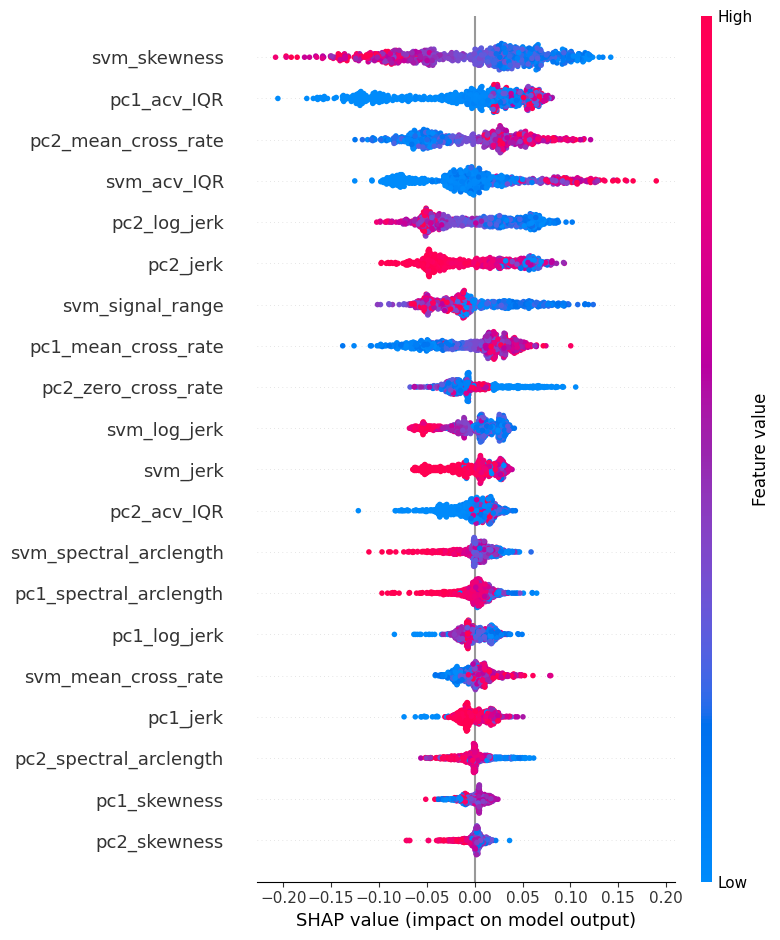

Time Taken in s: 317.18444085121155


In [29]:
shap_values = np.array(explainer.shap_values(X_test))
shap.summary_plot(shap_values[1],X_test)
print("Time Taken in s:", time.time() - start)

In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, n_estimators=2000)

## Testing set Performance

All metrics given at the end

In [19]:
y_test

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [20]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
lst00.append((fpr,tpr))

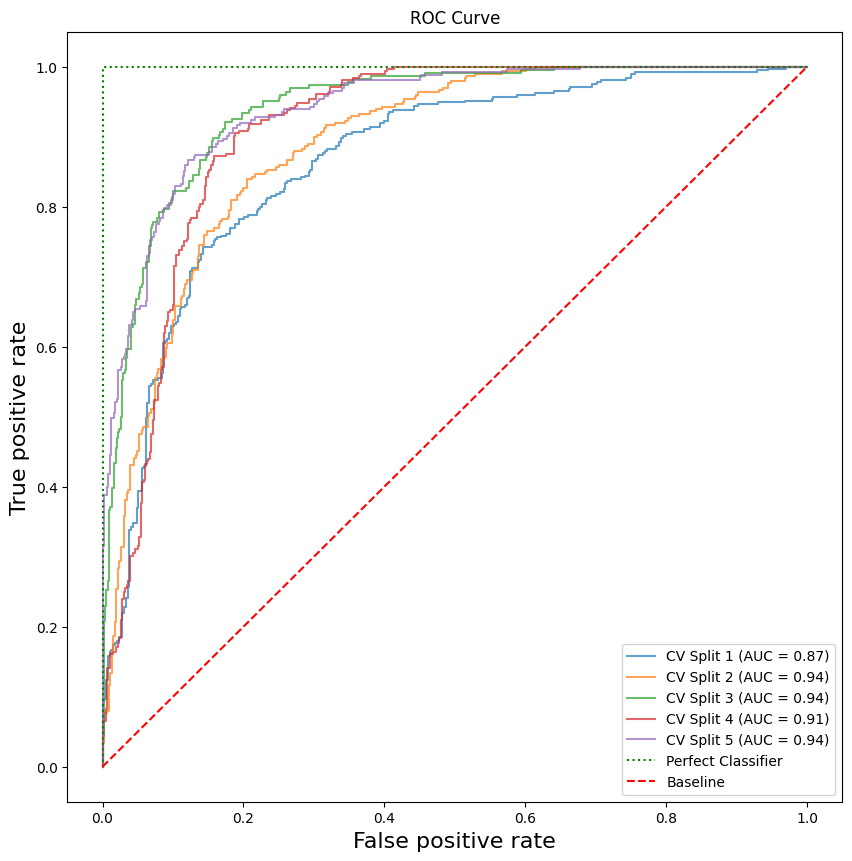

In [24]:
#y_pred_proba = clf.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)

#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
#roc_auc1 = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(lst00[0][0], lst00[0][1], label='CV Split 1 (AUC = %0.2f)' % (metrics.auc(lst00[0][0], lst00[0][1])), alpha = 0.7)
plt.plot(lst00[1][0], lst00[1][1], label='CV Split 2 (AUC = %0.2f)' % (0.94), alpha = 0.7)
plt.plot(lst00[2][0], lst00[2][1], label='CV Split 3 (AUC = %0.2f)' % (metrics.auc(lst00[2][0], lst00[2][1])), alpha = 0.7)
plt.plot(lst00[3][0], lst00[3][1], label='CV Split 4 (AUC = %0.2f)' % (metrics.auc(lst00[3][0], lst00[3][1])), alpha = 0.7)
plt.plot(lst00[4][0], lst00[4][1], label='CV Split 5 (AUC = %0.2f)' % (metrics.auc(lst00[4][0], lst00[4][1])), alpha = 0.7)

plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Baseline')
plt.xlabel('False positive rate',fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [25]:
preds = clf.predict(X_test)
print("Confusion Matrix:")
tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("\nClassification Report:")

print(metrics.classification_report(y_test, preds))

/usr/local/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Confusion Matrix:
True Positives: 273
False Positives: 8
True Negatives: 468
False Negatives: 17

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       476
           1       0.97      0.94      0.96       290

    accuracy                           0.97       766
   macro avg       0.97      0.96      0.97       766
weighted avg       0.97      0.97      0.97       766



In [26]:

print("Training Set Cross-Validation Performance (Average of 5 folds):\n")
print("Average AUROC: {:.2f}".format(np.mean(cv_auroc)))
print("Average Accuracy: {:.2f}".format(np.mean(cv_accuracy)))
print("Average F1 Score: {:.2f}".format(np.mean(cv_f1)))
print("Average Sensitivity: {:.2f}".format(np.mean(cv_sens)))
print("Average Specificity: {:.2f}".format(np.mean(cv_specificity)))
print("Average Positive Predictive Value: {:.2f}".format(np.mean(cv_ppv)))
print("Average Negative Predictive Value: {:.2f}".format(np.mean(cv_npv)))

y_pred_proba = clf.predict_proba(X_test)[:,1] 


print("\n\n\nTesting Set Performance (Average of 5 splits):\n")
print("AUROC: {:.2f}".format( metrics.roc_auc_score(y_test, y_pred_proba)))
print("Accuracy Score: {:.2f}".format( metrics.accuracy_score(y_test, clf.predict(X_test))))
print("F1 Score: {:.2f}".format(metrics.f1_score(y_test, clf.predict(X_test))))
print("Sensitivity: {:.2f}".format(tp/(tp+fn)))
print("Specificity: {:.2f}".format(tn/(tn + fp)) )
print("Positive Predictive Value: {:.2f}".format(tp/(tp+fp)))
print("Negative Predictive Value: {:.2f}".format(tn/(tn+fn)))



Training Set Cross-Validation Performance (Average of 5 folds):

Average AUROC: 0.91
Average Accuracy: 0.83
Average F1 Score: 0.76
Average Sensitivity: 0.72
Average Specificity: 0.89
Average Positive Predictive Value: 0.81
Average Negative Predictive Value: 0.84


/usr/local/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names






Testing Set Performance (Average of 5 splits):

AUROC: 1.00


/usr/local/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Accuracy Score: 0.97


/usr/local/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



F1 Score: 0.96
Sensitivity: 0.94
Specificity: 0.98
Positive Predictive Value: 0.97
Negative Predictive Value: 0.96
